<a href="https://colab.research.google.com/github/HarshaVardhan1027/Stock-Market-Price-Predictor/blob/main/Stock_Market_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# File paths (adjust names if different)
nse_path = "/content/drive/MyDrive/NSE Companies List.csv"
bse_path = "/content/drive/MyDrive/BSE Companies List.csv"
kaggle_path = "/content/drive/MyDrive/BSE_Equity.csv"

# Read CSVs
df_nse = pd.read_csv(nse_path)
df_bse = pd.read_csv(bse_path)
df_kaggle = pd.read_csv(kaggle_path)

print("NSE columns:", df_nse.columns)
print("BSE columns:", df_bse.columns)
print("Kaggle columns:", df_kaggle.columns)


NSE columns: Index(['Symbol', 'Series', 'Security Name', 'Band', 'Remarks'], dtype='object')
BSE columns: Index(['List of GSM companies w.e.f 06.06.2019', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')
Kaggle columns: Index(['Security Code', 'Issuer Name', 'Security Id', 'Security Name',
       'Status', 'Group', 'Face Value', 'ISIN No', 'Industry', 'Instrument',
       'Sector Name', 'Industry New Name', 'Igroup Name', 'ISubgroup Name'],
      dtype='object')


In [ ]:
import pandas as pd

# File paths from Google Drive (adjust names if different)
bse_equity_path = "/content/drive/MyDrive/BSE_Equity.csv"
bse_path = "/content/drive/MyDrive/BSE Companies List.csv"
nse_path = "/content/drive/MyDrive/NSE Companies List.csv"

# --- Load files ---
df_bse_equity = pd.read_csv(bse_equity_path)
df_bse = pd.read_csv(bse_path, skiprows=1)   # Skip first row
df_nse = pd.read_csv(nse_path)

# --- Clean NSE ---
df_nse_clean = df_nse.rename(columns={
    "Symbol": "SYMBOL",
    "Security Name": "COMPANY_NAME"
})
df_nse_clean["EXCHANGE"] = "NSE"
df_nse_clean = df_nse_clean[["SYMBOL", "COMPANY_NAME", "EXCHANGE"]]

# --- Clean BSE (official list) ---
df_bse_clean = df_bse.rename(columns={
    "Scrip code": "SYMBOL",
    "Security Name": "COMPANY_NAME"
})
df_bse_clean["EXCHANGE"] = "BSE"
df_bse_clean = df_bse_clean[["SYMBOL", "COMPANY_NAME", "EXCHANGE"]]

# --- Clean BSE_Equity (Kaggle) ---
df_bse_equity_clean = df_bse_equity.rename(columns={
    "Security Id": "SYMBOL",
    "Issuer Name": "COMPANY_NAME"
})
df_bse_equity_clean["EXCHANGE"] = "BSE_KAGGLE"
df_bse_equity_clean = df_bse_equity_clean[["SYMBOL", "COMPANY_NAME", "EXCHANGE"]]

# --- Merge all ---
combined = pd.concat([df_nse_clean, df_bse_clean, df_bse_equity_clean], ignore_index=True)

# Drop duplicates
combined = combined.drop_duplicates(subset=["SYMBOL","COMPANY_NAME","EXCHANGE"])

# --- Add yfinance-compatible ticker column ---
def make_yf_ticker(row):
    if row["EXCHANGE"] == "NSE":
        return row["SYMBOL"] + ".NS"
    elif row["EXCHANGE"] in ["BSE", "BSE_KAGGLE"]:
        return str(row["SYMBOL"]) + ".BO"
    else:
        return row["SYMBOL"]

combined["YF_TICKER"] = combined.apply(make_yf_ticker, axis=1)

# --- Save final CSV ---
output_path = "/content/drive/MyDrive/INDIAN_STOCK_TICKERS.csv"
combined.to_csv(output_path, index=False)

print("✅ Combined CSV with YF_TICKER saved at:", output_path)
combined.head(20)


✅ Combined CSV with YF_TICKER saved at: /content/drive/MyDrive/INDIAN_STOCK_TICKERS.csv


,SYMBOL,COMPANY_NAME,EXCHANGE,YF_TICKER
0,21STCENMGM,21ST CENTURY MANAGEMENT SERVICES LIMITED,NSE,21STCENMGM.NS
1,A2ZINFRA,A2Z INFRA ENGINEERING LIMITED,NSE,A2ZINFRA.NS
2,ACL,ANDHRA CEMENTS LIMITED,NSE,ACL.NS
3,AGSTRA,AGS TRANSACT TECHNOLOGIES LIMITED,NSE,AGSTRA.NS
4,ANSALAPI,ANSAL PROPERTIES & INFRASTRUCTURE LIMITED,NSE,ANSALAPI.NS
5,BLUECHIP,BLUE CHIP INDIA LIMITED,NSE,BLUECHIP.NS
6,DHARAN,DHARAN INFRA-EPC LIMITED,NSE,DHARAN.NS
7,EXCEL,EXCEL REALTY N INFRA LIMITED,NSE,EXCEL.NS
8,FEL,FUTURE ENTERPRISES LIMITED,NSE,FEL.NS
9,GVKPIL,GVK POWER & INFRASTRUCTURE LIMITED,NSE,GVKPIL.NS


In [ ]:
import pandas as pd

tickers_df = pd.read_csv("/content/drive/MyDrive/INDIAN_STOCK_TICKERS.csv")
print(tickers_df.head())

       SYMBOL                               COMPANY_NAME EXCHANGE  \
0  21STCENMGM   21ST CENTURY MANAGEMENT SERVICES LIMITED      NSE   
1    A2ZINFRA              A2Z INFRA ENGINEERING LIMITED      NSE   
2         ACL                     ANDHRA CEMENTS LIMITED      NSE   
3      AGSTRA          AGS TRANSACT TECHNOLOGIES LIMITED      NSE   
4    ANSALAPI  ANSAL PROPERTIES & INFRASTRUCTURE LIMITED      NSE   

       YF_TICKER  
0  21STCENMGM.NS  
1    A2ZINFRA.NS  
2         ACL.NS  
3      AGSTRA.NS  
4    ANSALAPI.NS  


In [ ]:
import yfinance as yf

# Example: Pick Reliance
symbol = "RELIANCE.NS"
data = yf.download(symbol, start="2020-01-01", end="2025-01-01")
print(data.head())

/tmp/ipython-input-3543988400.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2020-01-01  675.324158  683.152852  673.490062  679.081936    14004468
2020-01-02  686.821228  689.348791  676.397899  676.397899    17710316
2020-01-03  687.648804  689.661895  681.318729  685.792252    20984698
2020-01-06  671.700684  683.510767  670.134933  679.976719    24519177
2020-01-07  682.034607  686.463396  677.068950  679.529381    16683622


In [ ]:
for ticker in tickers_df["YF_TICKER"].head(10):  # head(10) = first 10 only
    try:
        df = yf.download(ticker, period="1y")
        print(f"✅ {ticker} downloaded, {len(df)} rows")
    except Exception as e:
        print(f"❌ Failed for {ticker}: {e}")

/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")


✅ 21STCENMGM.NS downloaded, 251 rows
✅ A2ZINFRA.NS downloaded, 251 rows


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")


✅ ACL.NS downloaded, 251 rows
✅ AGSTRA.NS downloaded, 251 rows


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")


✅ ANSALAPI.NS downloaded, 251 rows
✅ BLUECHIP.NS downloaded, 251 rows


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")


✅ DHARAN.NS downloaded, 61 rows
✅ EXCEL.NS downloaded, 251 rows


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4292604048.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed

✅ FEL.NS downloaded, 251 rows
✅ GVKPIL.NS downloaded, 251 rows


In [ ]:
df = yf.download(ticker, period="5y")
closing_prices = df["Close"].values
# --> feed this into your model

/tmp/ipython-input-4174015088.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="5y")
[*********************100%***********************]  1 of 1 completed


Enter stock name or symbol: MRF
Enter forecast period (in days): 30


/tmp/ipython-input-317526053.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="5y")
[*********************100%***********************]  1 of 1 completed

✅ Found: MRF LIMITED (MRF.NS)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1570
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0124
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0083
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0091
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0083


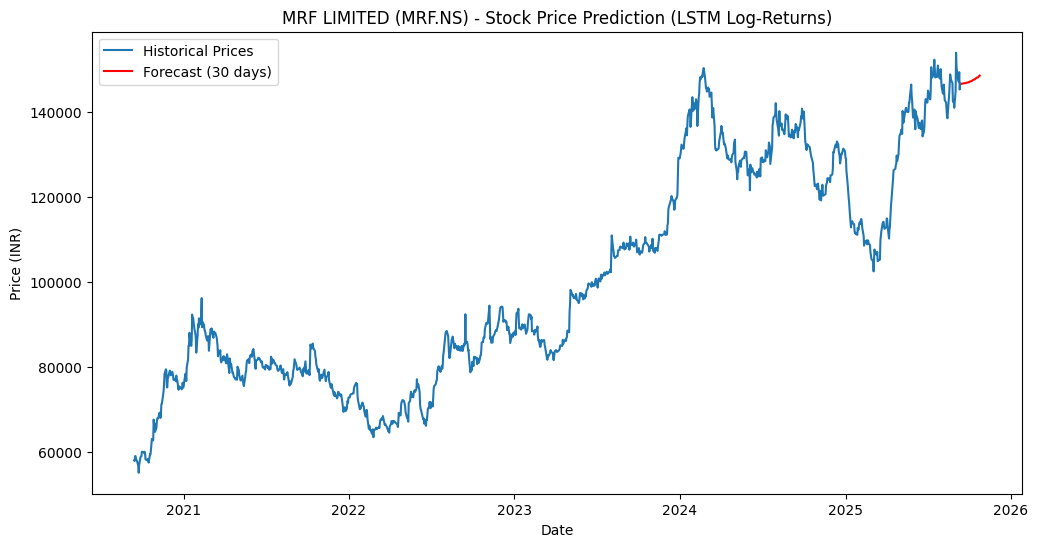


Predicted Prices:
 2025-09-15   146607.64
2025-09-16   146634.48
2025-09-17   146656.28
2025-09-18   146676.80
2025-09-19   146698.43
2025-09-22   146722.79
2025-09-23   146751.04
2025-09-24   146783.70
2025-09-25   146820.88
2025-09-26   146862.79
2025-09-29   146909.57
2025-09-30   146961.12
2025-10-01   147017.29
2025-10-02   147077.70
2025-10-03   147142.29
2025-10-06   147211.07
2025-10-07   147283.79
2025-10-08   147360.22
2025-10-09   147440.27
2025-10-10   147523.80
2025-10-13   147610.55
2025-10-14   147699.99
2025-10-15   147792.34
2025-10-16   147887.44
2025-10-17   147985.38
2025-10-20   148086.02
2025-10-21   148189.24
2025-10-22   148295.18
2025-10-23   148403.42
2025-10-24   148513.88
Freq: B, Name: Predicted_Price, dtype: float64

✅ Forecast saved to output/forecast_MRF.NS.csv


In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# -------- LOAD STOCK LIST --------
tickers_df = pd.read_csv("/content/drive/MyDrive/INDIAN_STOCK_TICKERS.csv")

def get_yf_ticker(user_input):
    match = tickers_df[
        (tickers_df["SYMBOL"].astype(str).str.upper() == user_input.upper()) |
        (tickers_df["COMPANY_NAME"].str.contains(user_input, case=False, na=False))
    ]
    if not match.empty:
        return match.iloc[0]["YF_TICKER"], match.iloc[0]["COMPANY_NAME"]
    else:
        return None, None

def predict_stock_lstm_logreturns(user_input, forecast_days=30):
    ticker, name = get_yf_ticker(user_input)
    if ticker is None:
        print("❌ Stock not found in master list")
        return

    print(f"✅ Found: {name} ({ticker})")

    # -------- DOWNLOAD DATA --------
    df = yf.download(ticker, period="5y")
    if df.empty:
        print("⚠️ No data available on Yahoo Finance")
        return

    prices = df['Close'].values.reshape(-1,1)

    # -------- CALCULATE LOG-RETURNS --------
    log_returns = np.log(prices[1:] / prices[:-1])

    # -------- SCALE LOG-RETURNS --------
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_returns = scaler.fit_transform(log_returns)

    # -------- CREATE SEQUENCES --------
    sequence_length = 40
    X, y = [], []
    for i in range(sequence_length, len(scaled_returns)):
        X.append(scaled_returns[i-sequence_length:i, 0])
        y.append(scaled_returns[i, 0])
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # -------- LSTM MODEL --------
    model = Sequential()
    model.add(LSTM(50, input_shape=(X.shape[1],1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train faster
    model.fit(X, y, epochs=5, batch_size=64, verbose=1)

    # -------- FORECAST LOG-RETURNS --------
    forecast_returns = []
    last_sequence = scaled_returns[-sequence_length:]

    for _ in range(forecast_days):
        input_seq = last_sequence.reshape(1, sequence_length, 1)
        pred = model.predict(input_seq, verbose=0)[0,0]
        forecast_returns.append(pred)
        last_sequence = np.append(last_sequence[1:], pred)

    # Inverse scale
    forecast_returns = scaler.inverse_transform(np.array(forecast_returns).reshape(-1,1)).flatten()

    # -------- CONVERT LOG-RETURNS TO PRICES --------
    last_price = prices[-1,0]
    forecast_prices = []
    for r in forecast_returns:
        next_price = last_price * np.exp(r)
        forecast_prices.append(next_price)
        last_price = next_price

    # Round to 2 decimals
    forecast_prices = np.round(forecast_prices, 2)

    # -------- CREATE DATES --------
    last_date = df.index[-1]
    forecast_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

    # -------- PLOT --------
    plt.figure(figsize=(12,6))
    plt.plot(df['Close'], label="Historical Prices")
    plt.plot(forecast_dates, forecast_prices, color='red', label=f"Forecast ({forecast_days} days)")
    plt.title(f"{name} ({ticker}) - Stock Price Prediction (LSTM Log-Returns)")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.legend()
    plt.show()

    # -------- CREATE FORECAST SERIES --------
    pd.options.display.float_format = '{:.2f}'.format
    forecast_df = pd.Series(forecast_prices, index=forecast_dates, name="Predicted_Price")
    print("\nPredicted Prices:\n", forecast_df)

    # -------- SAVE TO CSV --------
    # Create 'output' folder if not exists
    output_dir = "output"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    csv_path = os.path.join(output_dir, f"forecast_{ticker}.csv")
    forecast_df.to_csv(csv_path, header=True)
    print(f"\n✅ Forecast saved to {csv_path}")


# -------- USER INPUT --------
stock_input = input("Enter stock name or symbol: ")
days_input = int(input("Enter forecast period (in days): "))

predict_stock_lstm_logreturns(stock_input, forecast_days=days_input)
